In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

# Interpolation

In [20]:
# Step 1: Generate sample points
np.random.seed(42)
x = np.sort(np.random.rand(20) * 10)      # 10 random x points between 0 and 10
y = np.sin(x) + np.random.normal(0, 0.1, len(x))  # noisy sin curve

In [21]:
# Step 2: Create a fine grid within data range
x_fine = np.linspace(x.min(), x.max(), 400)

In [22]:
# Step 3: Apply different interpolation methods
# Linear interpolation
linear_interp = interpolate.interp1d(x, y, kind='linear')

# Cubic spline interpolation
cubic_interp = interpolate.interp1d(x, y, kind='cubic')

# Polynomial interpolation (degree = len(x)-1)
poly_coeffs = np.polyfit(x, y, deg=len(x)-1)
poly_interp = np.poly1d(poly_coeffs)

# Radial Basis Function interpolation
rbf_interp = interpolate.Rbf(x, y, function='multiquadric', smooth=0.2)

/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_2525/1186127966.py:9: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x, y, deg=len(x)-1)


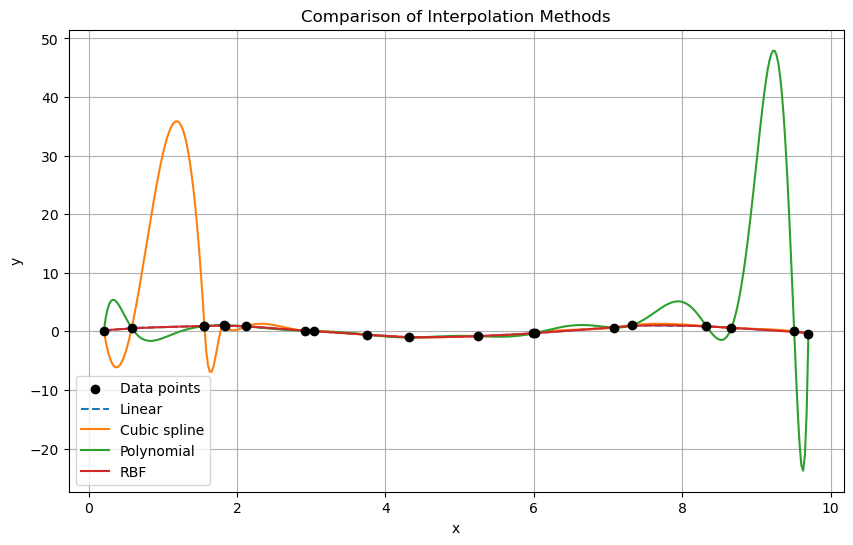

In [23]:
# Step 4: Plot everything
plt.figure(figsize=(10,6))
plt.scatter(x, y, color='black', label='Data points', zorder=5)
plt.plot(x_fine, linear_interp(x_fine), '--', label='Linear')
plt.plot(x_fine, cubic_interp(x_fine), label='Cubic spline')
plt.plot(x_fine, poly_interp(x_fine), label='Polynomial')
plt.plot(x_fine, rbf_interp(x_fine), label='RBF')

plt.title("Comparison of Interpolation Methods")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# Simulation of basis functions

## B-Splines functions

In [27]:
from scipy.interpolate import BSpline

In [24]:
# Step 1: Define knots and degree
degree = 3  # cubic B-spline
n_basis = 8
knots = np.linspace(0, 1, n_basis + degree + 1)

In [25]:
# Step 2: Grid for plotting
x = np.linspace(0, 1, 500)

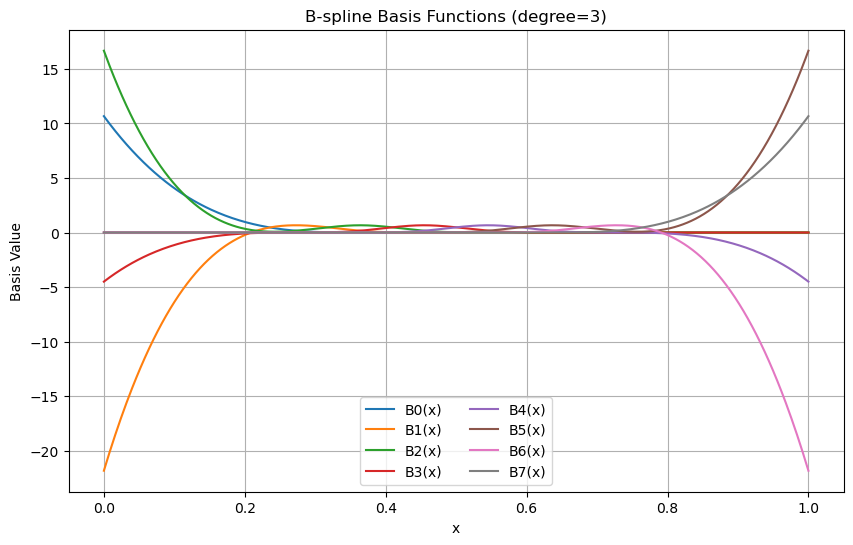

In [28]:
# Step 3: Plot each basis function
plt.figure(figsize=(10,6))
for i in range(n_basis):
    coeffs = np.zeros(n_basis)
    coeffs[i] = 1.0  # 1 for this basis, 0 for others
    spline = BSpline(knots, coeffs, degree)
    plt.plot(x, spline(x), label=f'B{i}(x)')

plt.title(f'B-spline Basis Functions (degree={degree})')
plt.xlabel('x')
plt.ylabel('Basis Value')
plt.legend(ncol=2)
plt.grid(True)
plt.show()

## Fourrier Basis functions

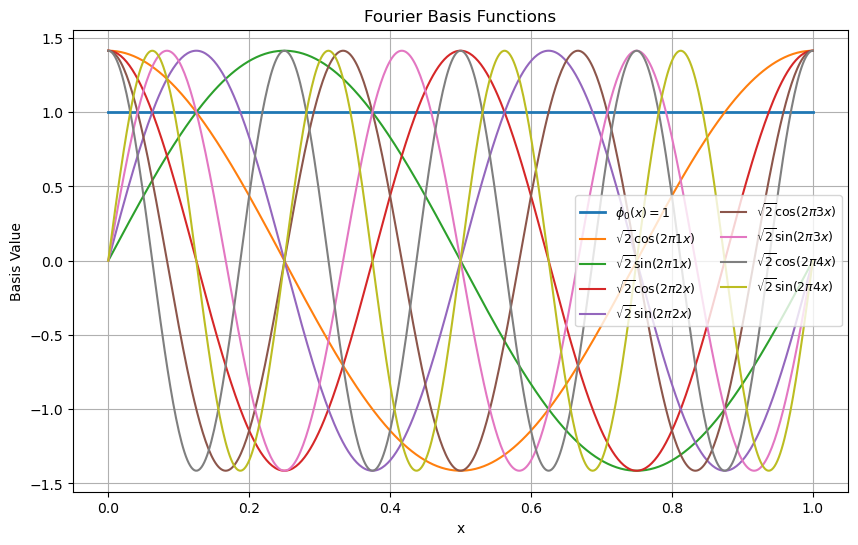

In [30]:
# Step 1: Define the domain
x = np.linspace(0, 1, 500)

# Step 2: Define how many frequencies (basis functions) to show
n_freq = 4  # Number of frequency components

# Step 3: Generate and plot Fourier basis functions
plt.figure(figsize=(10,6))
plt.plot(x, np.ones_like(x), label=r'$\phi_0(x) = 1$', lw=2)

for k in range(1, n_freq + 1):
    plt.plot(x, np.sqrt(2) * np.cos(2 * np.pi * k * x), label=rf'$\sqrt{{2}}\cos(2\pi {k}x)$')
    plt.plot(x, np.sqrt(2) * np.sin(2 * np.pi * k * x), label=rf'$\sqrt{{2}}\sin(2\pi {k}x)$')

plt.title("Fourier Basis Functions")
plt.xlabel("x")
plt.ylabel("Basis Value")
plt.legend(ncol=2, fontsize=9)
plt.grid(True)
plt.show()

## Polynomials

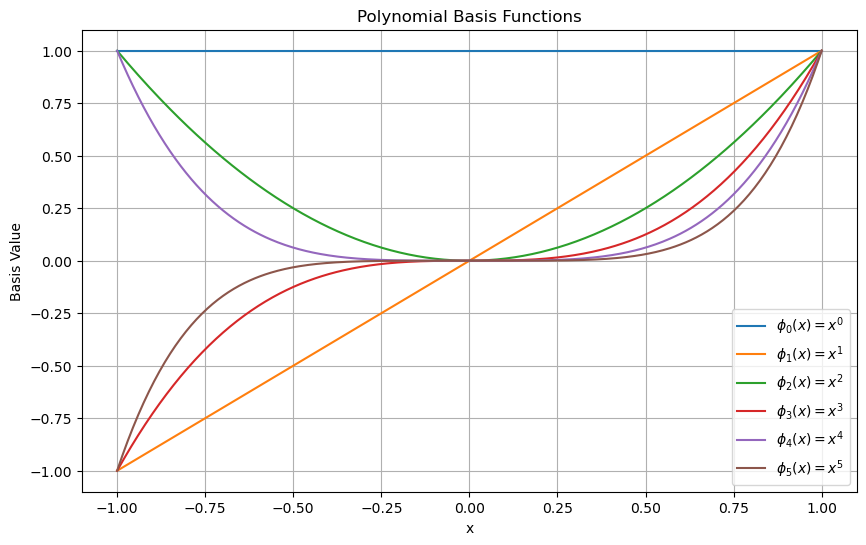

In [31]:
# Step 1: Define the domain
x = np.linspace(-1, 1, 400)

# Step 2: Define the degree of the polynomial basis
degree = 5

# Step 3: Plot the polynomial basis functions
plt.figure(figsize=(10,6))

for i in range(degree + 1):
    plt.plot(x, x**i, label=rf'$\phi_{i}(x) = x^{i}$')

plt.title("Polynomial Basis Functions")
plt.xlabel("x")
plt.ylabel("Basis Value")
plt.legend()
plt.grid(True)
plt.show()

## Wavelets

In [32]:
import pywt

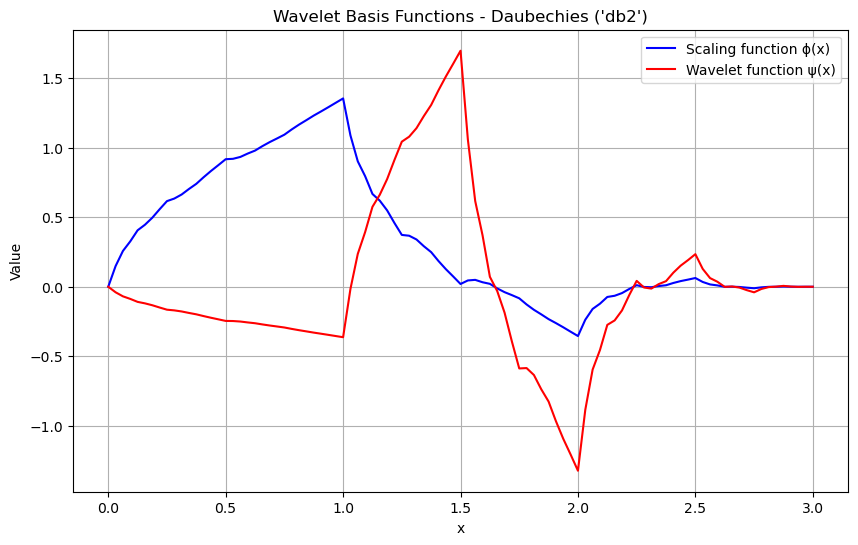

In [33]:
# Step 1: Choose a wavelet
wavelet = pywt.Wavelet('db2')  # Daubechies 2 (you can try 'haar', 'db4', etc.)

# Step 2: Get wavelet function data
phi, psi, x = wavelet.wavefun(level=5)  # scaling (phi) and wavelet (psi)

# Step 3: Plot the wavelet and scaling functions
plt.figure(figsize=(10,6))

plt.plot(x, phi, label='Scaling function ϕ(x)', color='blue')
plt.plot(x, psi, label='Wavelet function ψ(x)', color='red')

plt.title(f"Wavelet Basis Functions - {wavelet.family_name} ('{wavelet.name}')")
plt.xlabel("x")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

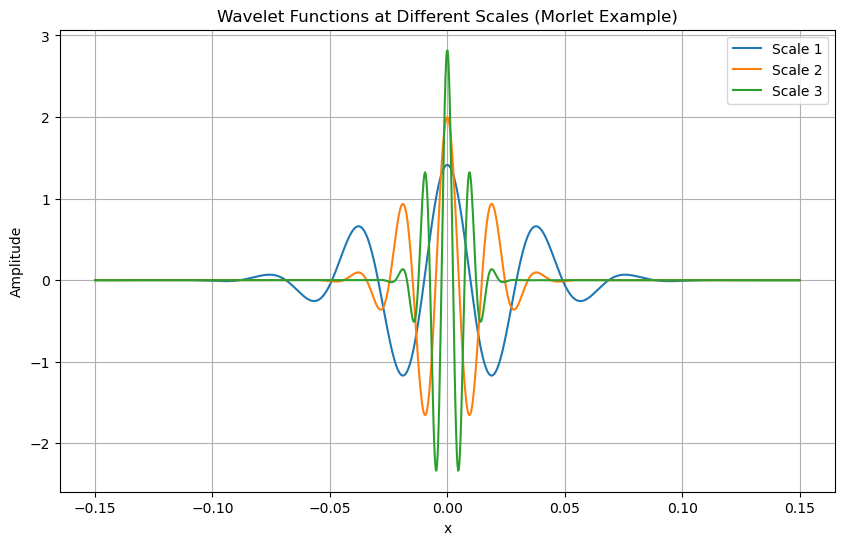

In [ ]:
plt.figure(figsize=(10,6))
x = np.linspace(-0.15, .15, 1000)
psi = pywt.ContinuousWavelet('morl').wavefun(length=len(x))[0]

for j in range(1, 4):
    plt.plot(x, 2**(j/2) * np.interp(2**j * x, np.linspace(-0.5,0.5,len(psi)), psi), label=f'Scale {j}')

plt.title("Wavelet Functions at Different Scales (Morlet Example)")
plt.xlabel("x")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()